In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [50]:
data = pd.read_csv('petrol_consumption.csv')
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


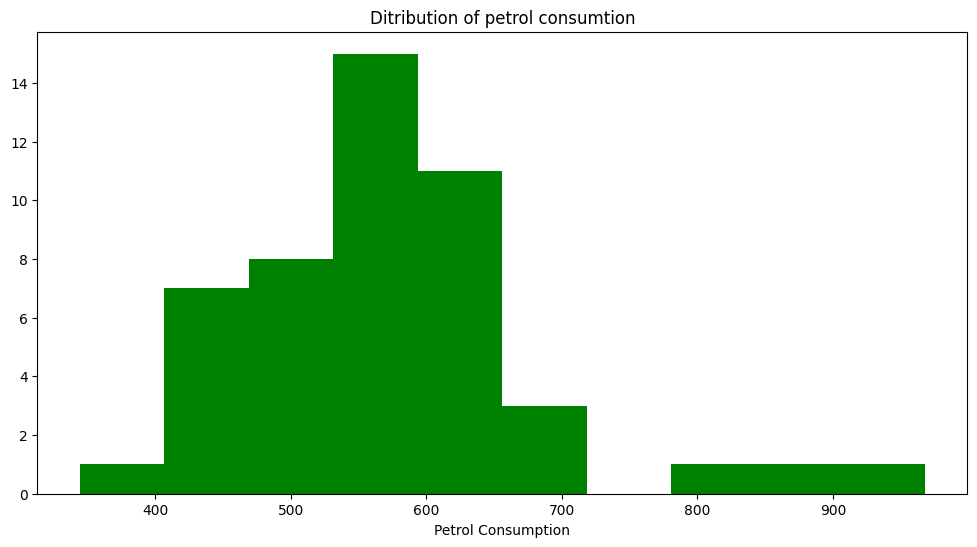

In [4]:
plt.figure(figsize = (12, 6))
plt.hist(data['Petrol_Consumption'], color='green', bins = 10)
plt.xlabel('Petrol Consumption')
plt.title(label = 'Ditribution of petrol consumtion', color = 'black')
plt.show()

In [5]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


In [6]:
 corr = data.corr()

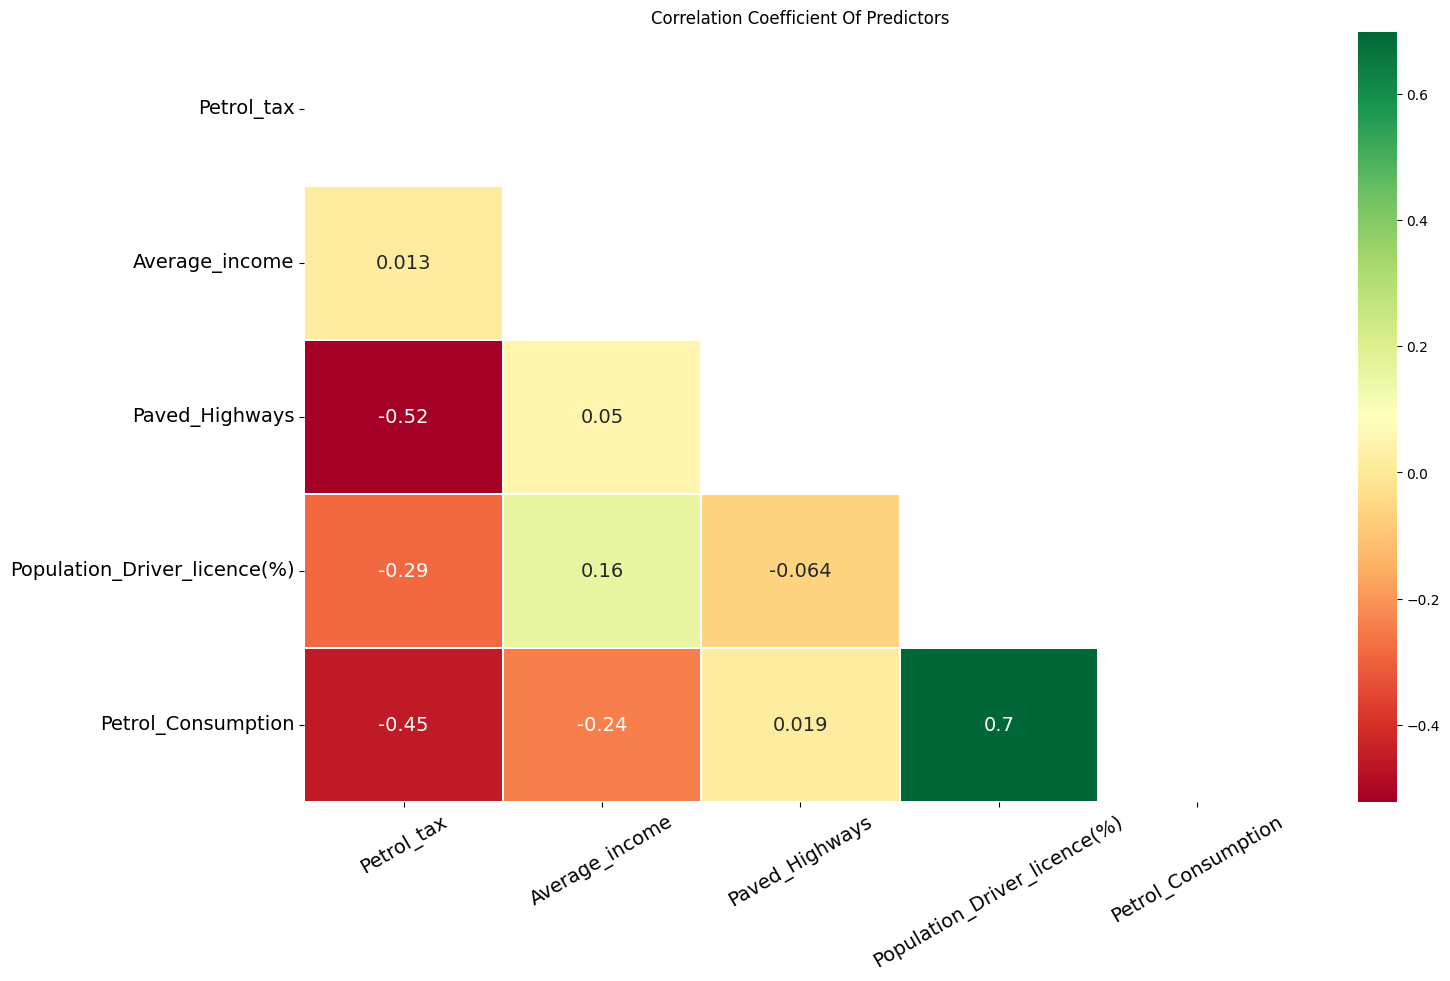

In [7]:
plt.figure(figsize = (16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))

fig = sb.heatmap(corr, cmap='RdYlGn', mask = mask, linewidths=0.30, annot = True, annot_kws = {'size' : 14})
fig.set_xticklabels(fig.get_xticklabels(), rotation = 30)
plt.title('Correlation Coefficient Of Predictors')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [37]:
y = data['Petrol_Consumption']
x = data[['Average_income', 'Petrol_tax', 'Population_Driver_licence(%)', 'Paved_Highways']]
x.head()

,Average_income,Petrol_tax,Population_Driver_licence(%),Paved_Highways
0,3571,9.0,0.525,1976
1,4092,9.0,0.572,1250
2,3865,9.0,0.580,1586
3,4870,7.5,0.529,2351
4,4399,8.0,0.544,431


In [47]:
k_folds = KFold(n_splits = 8, shuffle = True, random_state = 42)

In [51]:
def rmse(score):
    if score > 0:
        return np.sqrt(score)
    else:
        return np.sqrt(-score)

In [55]:
score_folds = cross_val_score(LR(), x, y, cv = k_folds)
rmse(score_folds.mean())

0.5866924831178829

Ми не можемо використовувати данну модель для прогнозування данних. 
Якщо ми подивимось на отримані коефіцієнти детермінації: array([ 0.53795249,  0.0490436 ,  0.60965691, -0.40964646,  0.48880019,
        0.66073659,  0.64078559,  0.17633564]),
то жоден з цих показників не є оптимальним для прогнозування. Як варіант для отриманих даних спробувати використати іншу модель МН, а також розширити набір даних. 
Модель побудована на всіх кореляційно залежних показниках до предиктора. Хоча я все ще сумніваюсь на рахунок показника "Податок на пальне", бо він залежний до провідних факторів. 